# Trabalho Computacional I - Sistemas de Comunicações Digitais 2024.2

# Aluno: João Vitor de Oliveira Fraga

# Matrícula: 537377


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from DigitalModulations import *

# Questão 1

In [71]:
# Parâmetros
M_symbols_QAM = [4, 16, 64] # Número de simbolos na constelação M-QAM
L_bits = 264000 # Número de bits a serem transmitidos
c_distance = 1 

for M in M_symbols_QAM:
    # Gerando bits aleatórios 
    bits = np.array([list(map(int, f"{i:0{int(np.log2(M))}b}")) for i in range(M)]).flatten()


    # Making a modulation
    qam_symbols, gray_labels = getQAM(bits, M, c_distance)
    
    energy = getEnergy(qam_symbols)
    print(f'A energia média para a modulação {M}-QAM é {energy:.2f}')

    min_distance = getMinDistance(qam_symbols)
    print(f'A distância média entre os símbolos para a modulação {M}-QAM é {min_distance:.2f}')


A energia média para a modulação 4-QAM é 2.00
A distância média entre os símbolos para a modulação 4-QAM é 2.00
A energia média para a modulação 16-QAM é 10.00
A distância média entre os símbolos para a modulação 16-QAM é 2.00
A energia média para a modulação 64-QAM é 42.00
A distância média entre os símbolos para a modulação 64-QAM é 2.00


Plotando a constelação 4-QAM com códigos Gray


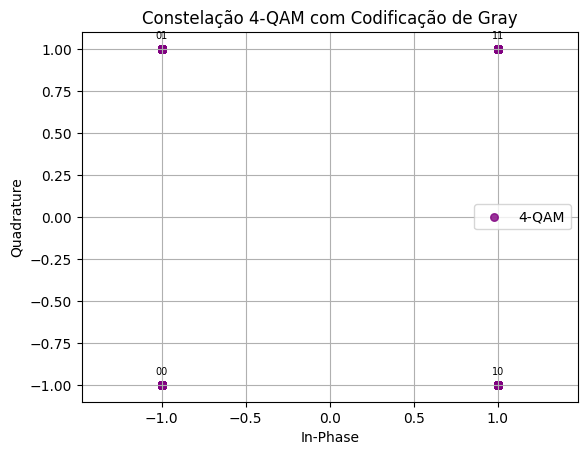

In [112]:
# Parâmetros
M = 4 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)


# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

# Plotando a constelação
plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='purple', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-QAM com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


Plotando a constelação 16-QAM com códigos Gray


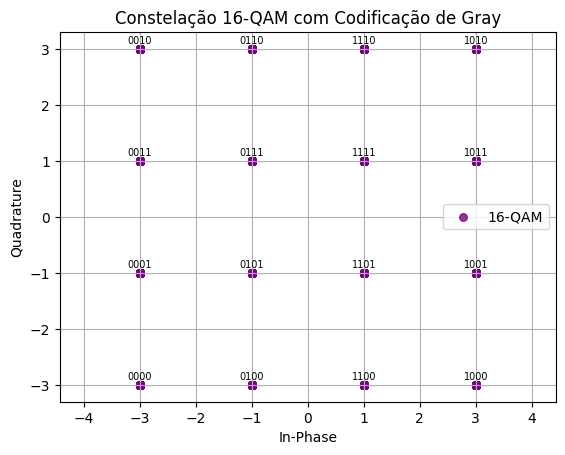

In [111]:
# Parâmetros
M = 16 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)

# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

# Plotando a constelação
plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='purple', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-QAM com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


Plotando a constelação 64-QAM com códigos Gray


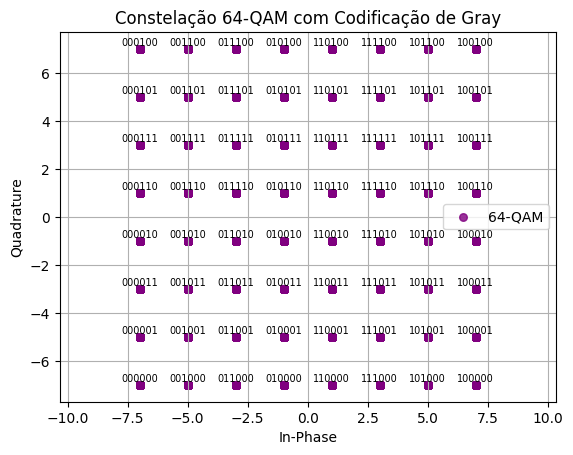

In [110]:
# Parâmetros
M = 64 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)
# Modulação
qam_symbols, gray_labels = getQAM(bits, M, c_distance)

plt.scatter(qam_symbols.real, qam_symbols.imag, s=30, color='purple', label=f'{M}-QAM', alpha=0.8)

# Adicionando os códigos Gray 
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-QAM com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


# Questão 2

Obtendo a SER para a modulação M-QAM, foi usada a equação:

$P_e = 4 \left( 1 - \frac{1}{\sqrt{M}} \right) Q\left( \sqrt{\frac{3 \cdot \frac{E_s}{N_0}}{M-1}} \right) - 4 \left( 1 - \frac{1}{\sqrt{M}} \right)^2 Q^2\left( \sqrt{\frac{3 \cdot \frac{E_s}{N_0}}{M-1}} \right)
$, onde $\frac{E}{N_0} = SNR$

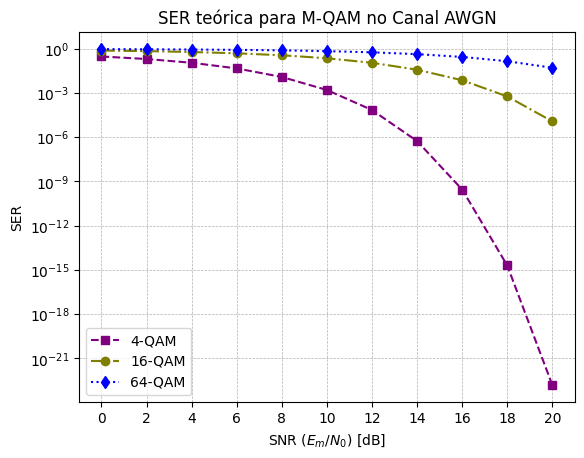

In [108]:
snr_range = np.arange(0, 22, 2) # SNR em dB
error_prob_theory_qam = [] 

for M in M_symbols_QAM:
    Pb = TheoricalErrorProbMQAM(M, snr_range)
    error_prob_theory_qam.append(Pb)

plt.figure()
plt.semilogy(snr_range, error_prob_theory_qam[0], '--s', label=f'{M_symbols_QAM[0]}-QAM', color='purple')
plt.semilogy(snr_range, error_prob_theory_qam[1], '-.o', label=f'{M_symbols_QAM[1]}-QAM', color='olive')
plt.semilogy(snr_range, error_prob_theory_qam[2], ':d', label=f'{M_symbols_QAM[2]}-QAM', color='blue')


# Configurações do gráfico
plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER teórica para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()  

# Questão 3

In [76]:
SER_simulated_QAM = []
BER_simulated_QAM = []

for M in M_symbols_QAM:
    SER, BER = getSERandBER(bits, M, snr_range, modulation_type='QAM')
    SER_simulated_QAM.append(SER)
    BER_simulated_QAM.append(BER)


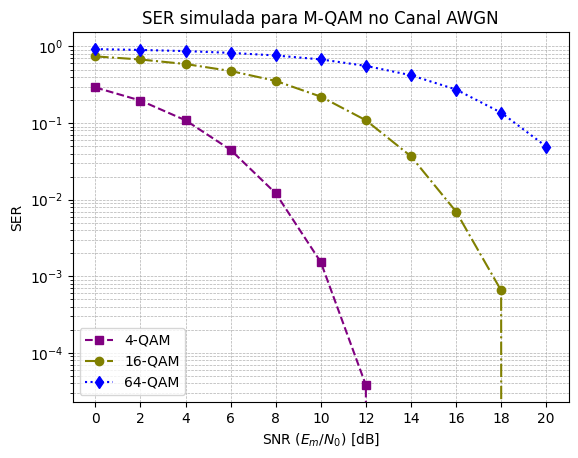

In [107]:
plt.figure()
plt.semilogy(snr_range, SER_simulated_QAM[0], '--s', label=f'{M_symbols_QAM[0]}-QAM', color='purple')
plt.semilogy(snr_range, SER_simulated_QAM[1], '-.o', label=f'{M_symbols_QAM[1]}-QAM', color='olive')
plt.semilogy(snr_range, SER_simulated_QAM[2], ':d', label=f'{M_symbols_QAM[2]}-QAM', color='blue')


plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER simulada para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

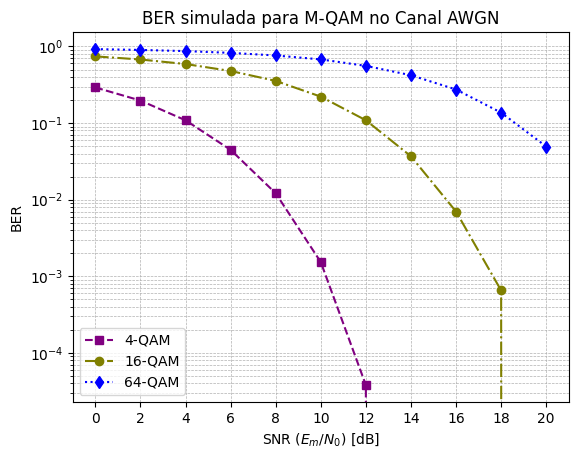

In [106]:
plt.figure()
plt.semilogy(snr_range, BER_simulated_QAM[0], '--s', label=f'{M_symbols_QAM[0]}-QAM', color='purple')
plt.semilogy(snr_range, BER_simulated_QAM[1], '-.o', label=f'{M_symbols_QAM[1]}-QAM', color='olive')
plt.semilogy(snr_range, BER_simulated_QAM[2], ':d', label=f'{M_symbols_QAM[2]}-QAM', color='blue')


plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('BER')
plt.title('BER simulada para M-QAM no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

# Questão 4


In [92]:
# Parametros
M_symbols_PSK= [4, 8] # Número de simbolos na constelação M-PSK
L_bits = 264000 # Número de bits a serem transmitidos

for M in M_symbols_PSK:
    # Gerando bits aleatórios 
    bits = np.array([list(map(int, f"{i:0{int(np.log2(M))}b}")) for i in range(M)]).flatten()


    # Modulação
    psk_symbols, gray_labels = getPSK(bits, M)
    
    energy = getEnergy(psk_symbols)
    print(f'A energia média para a modulação {M}-QAM é {energy:.2f}')

    min_distance = getMinDistance(psk_symbols)
    print(f'A distância média entre os símbolos para a modulação {M}-QAM é {min_distance:.2f}')


A energia média para a modulação 4-QAM é 1.00
A distância média entre os símbolos para a modulação 4-QAM é 1.41
A energia média para a modulação 8-QAM é 1.00
A distância média entre os símbolos para a modulação 8-QAM é 0.77


Plotando a constelação para 4-PSK

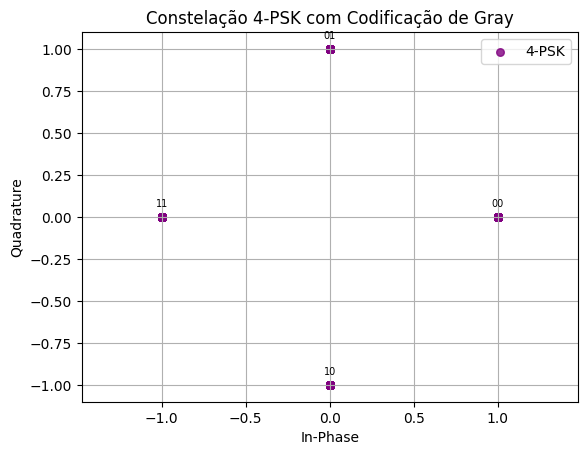

In [93]:
# Parâmetros
M = 4 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)


# Modulação
psk_symbols, gray_labels = getPSK(bits, M)

# Plotando a constelação
plt.scatter(psk_symbols.real, psk_symbols.imag, s=30, color='purple', label=f'{M}-PSK', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-PSK com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


Plotando a constelação para 8-PSK

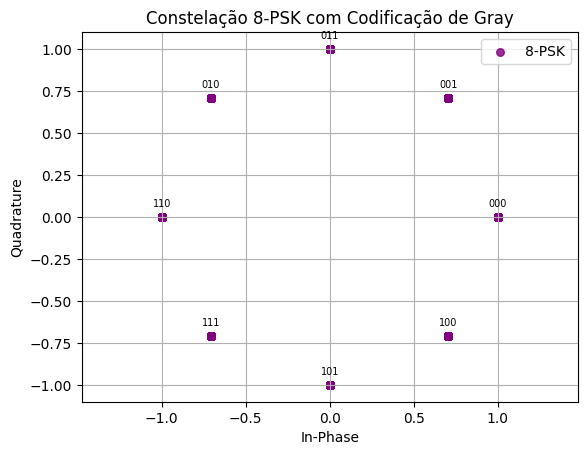

In [94]:
# Parâmetros
M = 8 

# Gerando uma sequência aleatória de bits
bits = np.random.randint(0, 2, L_bits)


# Modulação
psk_symbols, gray_labels = getPSK(bits, M)

# Plotando a constelação
plt.scatter(psk_symbols.real, psk_symbols.imag, s=30, color='purple', label=f'{M}-PSK', alpha=0.8)

# Adicionando os códigos Gray aos pontos
for symbol, gray_label in gray_labels.items():
    plt.text(symbol.real, symbol.imag + 0.05, gray_label, fontsize=7, ha='center', va='bottom')

plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.title(f'Constelação {M}-PSK com Codificação de Gray')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()


Obtendo a SER para a modulação M-PSK, foi usada a equação:

$P_e \approx 2 Q \left(\sqrt{\frac{2E}{N_0}}sen(\frac{\pi}{M})\right)$, onde $\frac{E}{N_0} = SNR$

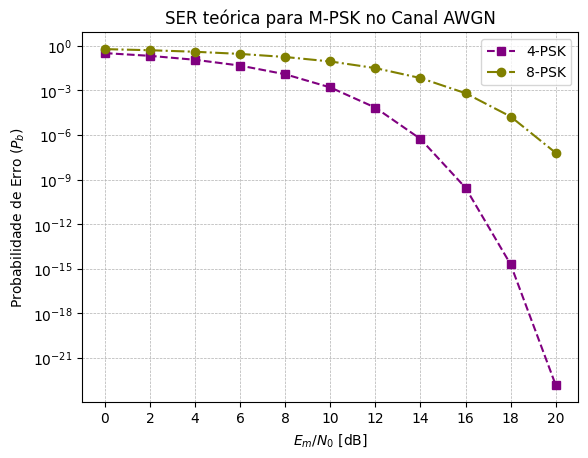

In [97]:
error_prob_theory_psk = [] 

for M in M_symbols_PSK:
    Pb = TheoricalErrorProbMPSK(M, snr_range)
    error_prob_theory_psk.append(Pb)

plt.figure()
plt.semilogy(snr_range, error_prob_theory_psk[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, error_prob_theory_psk[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')


# Configurações do gráfico
plt.xlabel('$E_m / N_0$ [dB]')
plt.ylabel('Probabilidade de Erro ($P_b$)')
plt.title('SER teórica para M-PSK no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()  

In [83]:
SER_simulated_PSK = []
BER_simulated_PSK = []

for M in M_symbols_PSK:
    SER, BER = getSERandBER(bits, M, snr_range, modulation_type='PSK')
    SER_simulated_PSK.append(SER)
    BER_simulated_PSK.append(BER)


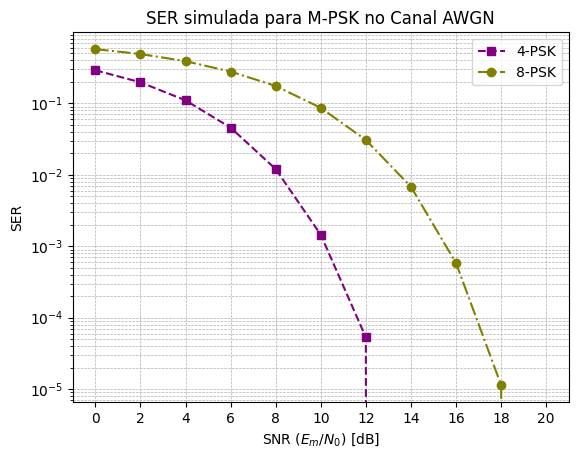

In [98]:
plt.figure()
plt.semilogy(snr_range, SER_simulated_PSK[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, SER_simulated_PSK[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')


plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER simulada para M-PSK no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

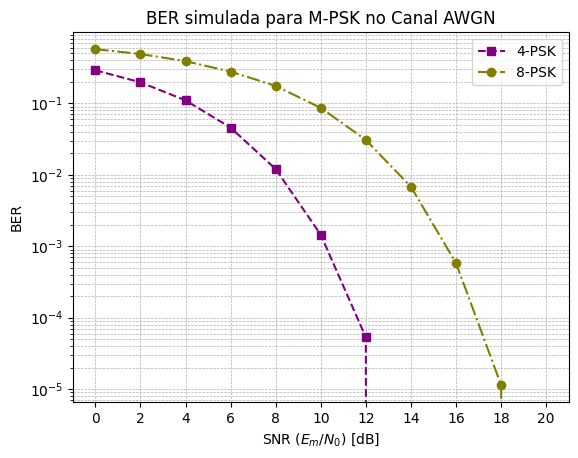

In [99]:
plt.figure()
plt.semilogy(snr_range, BER_simulated_PSK[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, BER_simulated_PSK[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')


plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('BER')
plt.title('BER simulada para M-PSK no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

# Questão 5

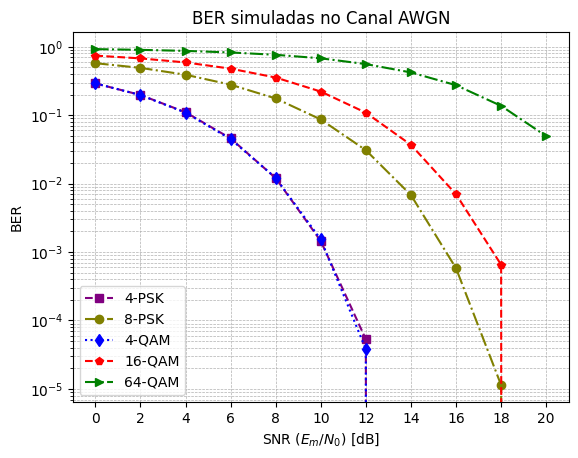

In [103]:
plt.figure()
plt.semilogy(snr_range, BER_simulated_PSK[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, BER_simulated_PSK[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')
plt.semilogy(snr_range, BER_simulated_QAM[0], ':d', label=f'{M_symbols_QAM[0]}-QAM', color='blue')
plt.semilogy(snr_range, BER_simulated_QAM[1], '--p', label=f'{M_symbols_QAM[1]}-QAM', color='red')
plt.semilogy(snr_range, BER_simulated_QAM[2], '-.>', label=f'{M_symbols_QAM[2]}-QAM', color='green')

plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('BER')
plt.title('BER simuladas no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()

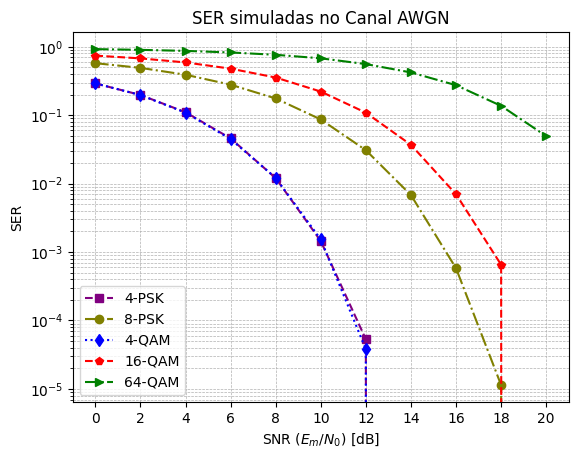

In [102]:
plt.figure()
plt.semilogy(snr_range, SER_simulated_PSK[0], '--s', label=f'{M_symbols_PSK[0]}-PSK', color='purple')
plt.semilogy(snr_range, SER_simulated_PSK[1], '-.o', label=f'{M_symbols_PSK[1]}-PSK', color ='olive')
plt.semilogy(snr_range, SER_simulated_QAM[0], ':d', label=f'{M_symbols_QAM[0]}-QAM', color='blue')
plt.semilogy(snr_range, SER_simulated_QAM[1], '--p', label=f'{M_symbols_QAM[1]}-QAM', color='red')
plt.semilogy(snr_range, SER_simulated_QAM[2], '-.>', label=f'{M_symbols_QAM[2]}-QAM', color='green')

plt.xlabel('SNR ($E_m / N_0$) [dB]')
plt.ylabel('SER')
plt.title('SER simuladas no Canal AWGN')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(snr_range)
plt.show()